In [1]:
import sklearn
import numpy
import pandas
import scipy
import re
import string
import datetime
from datetime import date

In [2]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing 

In [4]:
pandas.options.mode.chained_assignment = None

In [5]:
#Грузим файлик с багами
file=open('./jbsoa.csv')
data=pandas.read_csv(file)

In [6]:
data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Resolution,Components,Labels,...,JMS_lab,MessCore_lab,Tools_lab,EAP_lab,jUddi_lab,BPEL_lab,JBossWS_lab,JBRules_lab,Examples_lab,Other_lab
0,6121,0,SOA-3584,Client Recieving java.lang.IndexOutOfBoundsExc...,Closed,JBoss Enterprise SOA Platform,Major,Done,EDS,NaN,...,0,0,0,0,0,0,0,0,0,0
1,6122,1,SOA-3546,jpdl-3.2.xsd is missing cancel-event attribute,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,JBPM - standalone JBPM - within SOA,NaN,...,0,0,0,0,0,0,0,0,0,0
2,6123,2,SOA-3052,"JBDS 4 - jBPM upload URL is: ""/jbpm-console/u...",Closed,JBoss Enterprise SOA Platform,Critical,Migrated to another ITS,JBPM - within SOA Tooling,NaN,...,0,0,1,0,0,0,0,0,0,0
3,6124,3,SOA-3417,BusinessRulesProcessor action needs better sup...,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,JBossESB,NaN,...,0,0,0,0,0,0,0,0,0,0
4,6125,4,SOA-3011,remove backport-util-concurrent.jar in SOA-P,Closed,JBoss Enterprise SOA Platform,Minor,Migrated to another ITS,Compatibility EAP JBPM - within SOA,NaN,...,0,0,0,1,0,0,0,0,0,0
5,6126,5,SOA-3515,JBossWS-CXF JBWS944 test broken,Closed,JBoss Enterprise SOA Platform,Minor,Migrated to another ITS,JBossWS,NaN,...,0,0,0,0,0,0,1,0,0,0
6,6127,6,SOA-1266,Scout creates a new AuthToken for every invoca...,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,JBossESB,NaN,...,0,0,0,0,0,0,0,0,0,0
7,6128,7,SOA-2030,JmsConnectionPool searches for associated JmsS...,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,JBossESB,NaN,...,0,0,0,0,0,0,0,0,0,0
8,6129,8,SOA-3667,How to enable brms to use modeshape when jboss...,Closed,JBoss Enterprise SOA Platform,Minor,Migrated to another ITS,Documentation EDS,NaN,...,0,0,0,0,0,0,0,0,0,0
9,6130,9,SOA-3431,JBossWS Native testsuite depends on aop versio...,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,Build Process JBossWS,NaN,...,0,0,0,0,0,0,1,0,0,0


ttr
Минимум: 0  Максимум: 1354  Среднее: 118.82767624020887
Attachments
Минимум: 0  Максимум: 13  Среднее: 0.3268059181897302
Comments
Минимум: 1  Максимум: 34  Среднее: 4.535248041775457


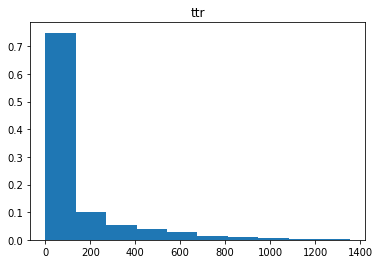

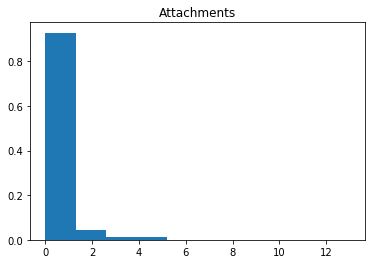

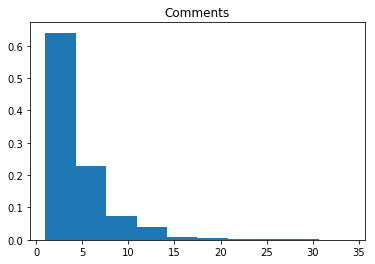

In [6]:

def infa(data, field):
    #Выводим основные показатели
    print (field)    
    print ('Минимум: ' + str(data[field].min())+ '  Максимум: ' + str(data[field].max())+'  Среднее: ' + str(data[field].mean()))
     
    #Строим гистограммы    
    plt.figure()
    btt=numpy.array(data[field])
    hist_rf=plt.hist(btt, weights=numpy.zeros_like(btt) + 1. / btt.size, bins=10)
    plt.title(field) 
    
    return

infa(data, 'ttr')
infa(data, 'Attachments')
infa(data, 'Comments')

Status
Closed    2298
Name: Issue_key, dtype: int64


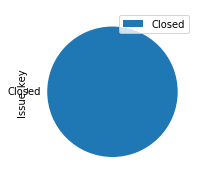

In [7]:
#Смотрим, какие статусы есть, и отображаем это на pie chart
print(data.groupby(['Status'])['Issue_key'].count())
plot = data.groupby(['Status'])['Issue_key'].count().plot.pie(y='Status', figsize=(3, 3), legend=True)


Resolution
Cannot Reproduce             40
Deferred                     10
Done                       1665
Duplicate Issue              79
Incomplete Description        2
Migrated to another ITS     126
Out of Date                 128
Partially Completed           2
Rejected                    148
Won't Fix                    98
Name: Issue_key, dtype: int64


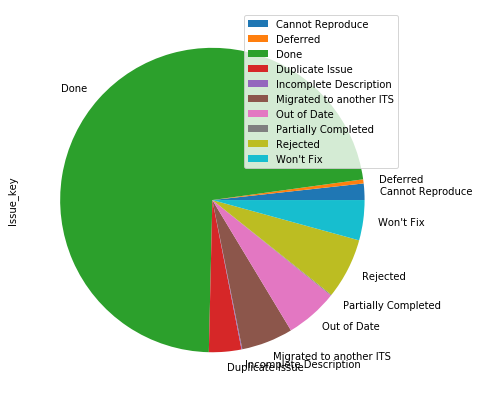

In [8]:
#Смотрим, какие решения есть, и отображаем это на pie chart
print(data.groupby(['Resolution'])['Issue_key'].count())
plot = data.groupby(['Resolution'])['Issue_key'].count().plot.pie(y='Status', figsize=(7, 7),  legend=True)

Priority
Blocker      268
Critical     215
Major       1461
Minor        332
Optional       8
Trivial       14
Name: Issue_key, dtype: int64


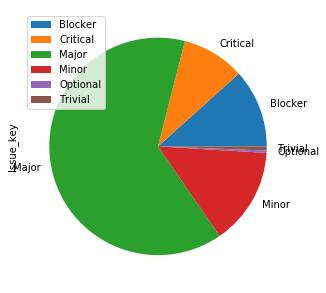

In [9]:
#Смотрим, какие приоритеты есть, и отображаем это на pie chart
print(data.groupby(['Priority'])['Issue_key'].count())
plot = data.groupby(['Priority'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

was_reopened
0.0    1788
1.0     510
Name: Issue_key, dtype: int64


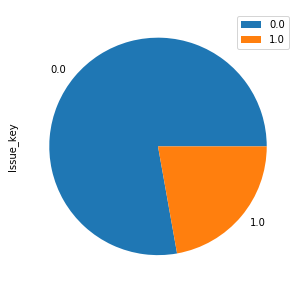

In [10]:
#Смотрим переоткрытые, и отображаем это на pie chart
print(data.groupby(['was_reopened'])['Issue_key'].count())
plot = data.groupby(['was_reopened'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

In [6]:
AOT=['Docs', 'Build', 'MonitorManage', 'ESB', 'EDS', 'JBPM', 'JMS', 'Tools', 'EAP', 'jUddi', 'BPEL','JBossWS', 'JBRules', 'Examples', 'Other' ]

<BarContainer object of 15 artists>

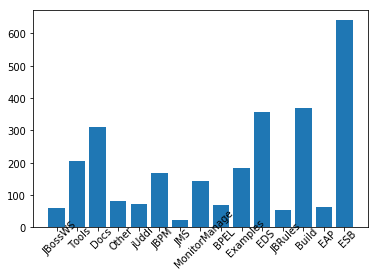

In [13]:
#считаем,  сколько багов у каждой области тестирования
an={}
for i in range(len(AOT)):
    an.update({AOT[i]:data[AOT[i]+'_lab'].sum()}) 

#строим bar chart    
plt.figure()
plt.xticks(range(len(an)), an.keys(),rotation=45, rotation_mode='anchor')    
plt.bar(range(len(an)), list(an.values()), align='center')

In [7]:
bin_data=data

#бинаризуем категориальные данные
bin_data=pandas.get_dummies(bin_data, prefix=['Resolution'], columns=['Resolution'])

#Ординальные переменные кодируем
bin_data['Priority_ord']=bin_data['Priority'].astype("category", ordered=True,categories=['Optional', 'Trivial', 'Minor', 'Major', 'Critical', 'Blocker']).cat.codes

#нормализация числовых параметров
bin_data['norm_ttr']=preprocessing.scale(bin_data['ttr'])
bin_data['norm_att']=preprocessing.scale(bin_data['Attachments'])
bin_data['norm_comm']=preprocessing.scale(bin_data['Comments'])

#присоединяем редкие resolution к более крупным группам или объединяем их
bin_data['Resolution_Wont Fix_new']=bin_data["Resolution_Won't Fix"]+bin_data['Resolution_Cannot Reproduce']+bin_data['Resolution_Incomplete Description']
bin_data['Resolution_Out of Date_new']=bin_data['Resolution_Out of Date']+bin_data['Resolution_Deferred']+bin_data['Resolution_Partially Completed']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  import sys
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [14]:
bin_data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Components,Labels,Description,...,Resolution_Out of Date,Resolution_Partially Completed,Resolution_Rejected,Resolution_Won't Fix,Priority_ord,norm_ttr,norm_att,norm_comm,Resolution_Wont Fix_new,Resolution_Out of Date_new
0,6121,0,SOA-3584,Client Recieving java.lang.IndexOutOfBoundsExc...,Closed,JBoss Enterprise SOA Platform,Major,EDS,NaN,When attempting to perform the following quer...,...,0,0,0,0,3,-0.412576,-0.353183,-0.744502,0,0
1,6122,1,SOA-3546,jpdl-3.2.xsd is missing cancel-event attribute,Closed,JBoss Enterprise SOA Platform,Major,JBPM - standalone JBPM - within SOA,NaN,"Platform JIRA for <a href=""https://issues.jbo...",...,0,0,0,0,3,-0.235394,-0.353183,-0.450842,0,0
2,6123,2,SOA-3052,"JBDS 4 - jBPM upload URL is: ""/jbpm-console/u...",Closed,JBoss Enterprise SOA Platform,Critical,JBPM - within SOA Tooling,NaN,"Related to <a href=""https://issues.jboss.org/...",...,0,0,0,0,4,0.670202,-0.353183,0.136479,0,0
3,6124,3,SOA-3417,BusinessRulesProcessor action needs better sup...,Closed,JBoss Enterprise SOA Platform,Major,JBossESB,NaN,"In order to support common CEP scenarios, the...",...,0,0,0,0,3,-0.053291,1.808241,0.430140,0,0
4,6125,4,SOA-3011,remove backport-util-concurrent.jar in SOA-P,Closed,JBoss Enterprise SOA Platform,Minor,Compatibility EAP JBPM - within SOA,NaN,"I see <a href=""https://hudson.qa.jboss.com/hu...",...,0,0,0,0,2,0.798166,-0.353183,0.136479,0,0
5,6126,5,SOA-3515,JBossWS-CXF JBWS944 test broken,Closed,JBoss Enterprise SOA Platform,Minor,JBossWS,NaN,JBWS944 Test in JBossWS-CXF has broken test d...,...,0,0,0,0,2,-0.191099,-0.353183,-1.038163,0,0
6,6127,6,SOA-1266,Scout creates a new AuthToken for every invoca...,Closed,JBoss Enterprise SOA Platform,Major,JBossESB,NaN,"See <a href=""https://issues.jboss.org/browse/...",...,0,0,0,0,3,4.415629,-0.353183,0.136479,0,0
7,6128,7,SOA-2030,JmsConnectionPool searches for associated JmsS...,Closed,JBoss Enterprise SOA Platform,Major,JBossESB,NaN,NaN,...,0,0,0,0,3,2.594594,-0.353183,-0.744502,0,0
8,6129,8,SOA-3667,How to enable brms to use modeshape when jboss...,Closed,JBoss Enterprise SOA Platform,Minor,Documentation EDS,NaN,The jboss-brms.war is being deployed to SOA w...,...,0,0,0,0,2,-0.451950,-0.353183,-0.744502,0,0
9,6130,9,SOA-3431,JBossWS Native testsuite depends on aop versio...,Closed,JBoss Enterprise SOA Platform,Major,Build Process JBossWS,NaN,org.jboss.test.ws.jaxws.samples.dar.JMSClient...,...,0,0,0,0,3,-0.087743,-0.353183,-1.038163,0,0


In [8]:
#trash_priority=[0,1]
#bin_data['Priority_ord_new']=numpy.where((bin_data['Priority_ord'].isin (trash_priority)==True),2,bin_data['Priority_ord'])
clust_data=bin_data[['Docs_lab',
 'Build_lab',
 'MonitorManage_lab',
 'ESB_lab',
 'EDS_lab',
 'JBPM_lab',
 'JMS_lab',
 'Tools_lab',
 'EAP_lab',
 'jUddi_lab',
 'BPEL_lab',
 'JBossWS_lab',
 'JBRules_lab',
 'Examples_lab',
 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]


In [57]:
clust_data

,Docs_lab,Build_lab,MonitorManage_lab,ESB_lab,EDS_lab,JBPM_lab,JMS_lab,Tools_lab,EAP_lab,jUddi_lab,...,Resolution_Done,Resolution_Duplicate Issue,Resolution_Out of Date_new,Resolution_Rejected,Resolution_Wont Fix_new,Resolution_Migrated to another ITS,Priority_ord,norm_ttr,norm_att,norm_comm
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.412576,-0.353183,-0.744502
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,3,-0.235394,-0.353183,-0.450842
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,4,0.670202,-0.353183,0.136479
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,3,-0.053291,1.808241,0.430140
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,2,0.798166,-0.353183,0.136479
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,-0.191099,-0.353183,-1.038163
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,3,4.415629,-0.353183,0.136479
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,3,2.594594,-0.353183,-0.744502
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,2,-0.451950,-0.353183,-0.744502
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,-0.087743,-0.353183,-1.038163


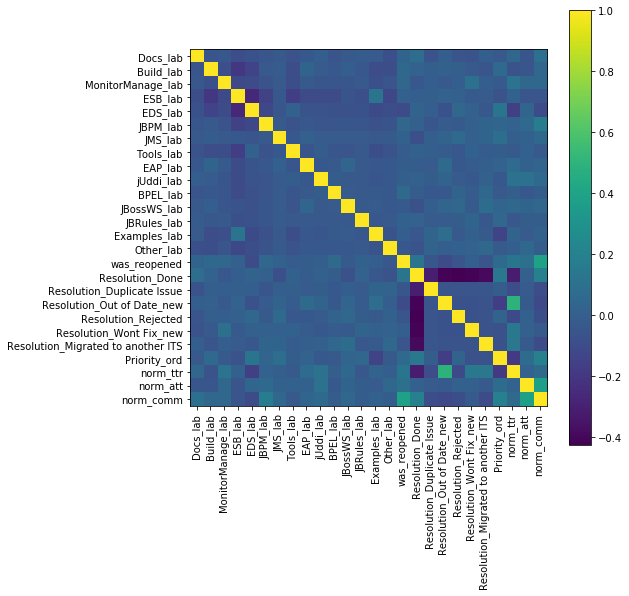

In [17]:
from matplotlib.colors import LinearSegmentedColormap
def corr_heatmap(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    corr_ = data.corr(method='pearson')
    ax.set_xticks(numpy.arange(len(list(data))))
    ax.set_yticks(numpy.arange(len(list(data))))
    ax.set_xticklabels(list(data),rotation=90)
    ax.set_yticklabels(list(data))
    im = ax.imshow(corr_)
    plt.colorbar(im)
    return plt.show()


corr_heatmap(clust_data)


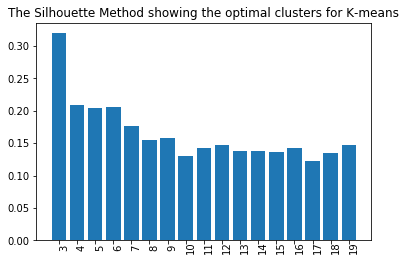

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

def silh_index(data):
    silh_ind={}
    for i in range(3,20):
        kmeans=KMeans(n_clusters=i, random_state=42)
        labi=kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data,labi, metric='minkowski')
        silh_ind.update({i:silhouette_avg})
    plt.figure()
    plt.xticks(range(len(silh_ind)), silh_ind.keys(),rotation=90, rotation_mode='anchor')    
    plt.bar(range(len(silh_ind)), silh_ind.values(), align='center')
    plt.title('The Silhouette Method showing the optimal clusters for K-means')
    return plt.bar

silh_index(clust_data)

def caha_index(data):
    caha_ind={}
    for i in range(3,16):
        kmeans=KMeans(n_clusters=i, random_state=0).fit(data)
        cllab = kmeans.labels_
        caha=metrics.calinski_harabaz_score(data, cllab) 
        caha_ind.update({i:caha})   
    plt.figure()
    plt.xticks(range(len(caha_ind)), caha_ind.keys(),rotation=90, rotation_mode='anchor')    
    plt.bar(range(len(caha_ind)), caha_ind.values(), align='center')
    
    return plt.bar 

#caha_index(clust_data)

def db_index(data):
    db_ind={}
    for i in range(3,16):
        kmeans=KMeans(n_clusters=i, random_state=0).fit(data)
        cllab = kmeans.labels_
        dbi=metrics.davies_bouldin_score(data, cllab) 
        db_ind.update({i:dbi})   
    plt.figure()
    plt.xticks(range(len(db_ind)), db_ind.keys(),rotation=90, rotation_mode='anchor')    
    plt.bar(range(len(db_ind)), db_ind.values(), align='center')
    return plt.bar 

#db_index(clust_data) в 20-той версии

def elbow(data):
    distortions=[]
    K = range(3,20)
    for i in K:
        kmeans=KMeans(n_clusters=i, random_state=0).fit(data)
        distortions.append(sum(numpy.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
        
    plt.figure()
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal clusters for K-means')
    return plt.show()     
 
#elbow(clust_data)

In [13]:
def km_clustering(n,data): 
    headers=list(data)
    zz={}
    km = KMeans(n_clusters=n, random_state=42).fit(data)
    data['cluster_km'] = km.labels_
    zentr=numpy.round(km.cluster_centers_, 3)    

    for i in range(n):
        zrow=zentr[i,:]
        zi=dict(zip(headers, zrow))
        zz.update({i:zi})             
    print(zz) 
    return data

data_km=clust_data[['Docs_lab', 'Build_lab', 'MonitorManage_lab', 'ESB_lab', 'EDS_lab', 'JBPM_lab', 'JMS_lab', 'Tools_lab', 'EAP_lab', 'jUddi_lab', 'BPEL_lab', 'JBossWS_lab', 'JBRules_lab', 'Examples_lab', 'Other_lab','was_reopened', 'Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]
d_km=km_clustering(3,data_km)
print (d_km.groupby(['cluster_km']).size())


{0: {'BPEL_lab': 0.024, 'Resolution_Done': 0.837, 'JMS_lab': 0.033, 'JBPM_lab': 0.139, 'was_reopened': 0.498, 'Resolution_Duplicate Issue': 0.019, 'Priority_ord': 3.67, 'Tools_lab': 0.072, 'MonitorManage_lab': 0.072, 'norm_ttr': -0.036, 'EDS_lab': 0.129, 'Build_lab': 0.187, 'norm_att': 1.969, 'Examples_lab': 0.096, 'Docs_lab': 0.153, 'JBossWS_lab': 0.057, 'Resolution_Out of Date_new': 0.019, 'jUddi_lab': 0.067, 'ESB_lab': 0.23, 'norm_comm': 2.004, 'Resolution_Wont Fix_new': 0.043, 'Other_lab': 0.067, 'Resolution_Rejected': 0.057, 'JBRules_lab': 0.029, 'Resolution_Migrated to another ITS': 0.024, 'EAP_lab': 0.048}, 1: {'BPEL_lab': 0.03, 'Resolution_Done': 0.78, 'JMS_lab': 0.007, 'JBPM_lab': 0.068, 'was_reopened': 0.189, 'Resolution_Duplicate Issue': 0.041, 'Priority_ord': 3.174, 'Tools_lab': 0.092, 'MonitorManage_lab': 0.047, 'norm_ttr': -0.348, 'EDS_lab': 0.177, 'Build_lab': 0.166, 'norm_att': -0.207, 'Examples_lab': 0.074, 'Docs_lab': 0.136, 'JBossWS_lab': 0.02, 'Resolution_Out of Dat

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

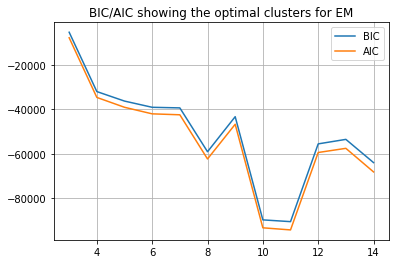

In [11]:
from sklearn.mixture import GaussianMixture


def AIC_BIC(data):
    plt.figure()
    n_components = numpy.arange(3, 15)    
    models = [GaussianMixture(n, covariance_type='tied', random_state=0).fit(data)
              for n in n_components]
    plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
    plt.legend() 
    plt.title('BIC/AIC showing the optimal clusters for EM')
    plt.grid(True)
    return plt

AIC_BIC(clust_data)

In [10]:
def em_clust(data,n):
    gmm = GaussianMixture(n_components=n, random_state=0,covariance_type='tied',)
    gmm.fit(data)
    data['cluster_em'] = gmm.predict(data)
    for i in range (n):
        temp=data[data['cluster_em']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())
        
    print (gmm.score(data[['Docs_lab', 'Build_lab', 'MonitorManage_lab', 'ESB_lab', 'EDS_lab', 'JBPM_lab', 'JMS_lab', 'Tools_lab', 'EAP_lab', 'jUddi_lab', 'BPEL_lab', 'JBossWS_lab', 'JBRules_lab', 'Examples_lab', 'Other_lab','was_reopened' ,'Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]
))
    print (gmm.score_samples(data[['Docs_lab', 'Build_lab', 'MonitorManage_lab', 'ESB_lab', 'EDS_lab', 'JBPM_lab', 'JMS_lab', 'Tools_lab', 'EAP_lab', 'jUddi_lab', 'BPEL_lab', 'JBossWS_lab', 'JBRules_lab', 'Examples_lab', 'Other_lab','was_reopened' ,'Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]
))
    return 


clust_data_gmm=clust_data[['Docs_lab', 'Build_lab', 'MonitorManage_lab', 'ESB_lab', 'EDS_lab', 'JBPM_lab', 'JMS_lab', 'Tools_lab', 'EAP_lab', 'jUddi_lab', 'BPEL_lab', 'JBossWS_lab', 'JBRules_lab', 'Examples_lab', 'Other_lab','was_reopened' ,'Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]
em_clust(clust_data_gmm,11)

Cluster # 0, count: 138
Docs_lab                              0.144928
Build_lab                             0.224638
MonitorManage_lab                     0.065217
ESB_lab                               0.000000
EDS_lab                               0.391304
JBPM_lab                              0.072464
JMS_lab                               0.000000
Tools_lab                             0.108696
EAP_lab                               0.014493
jUddi_lab                             0.000000
BPEL_lab                              0.021739
JBossWS_lab                           0.043478
JBRules_lab                           0.028986
Examples_lab                          0.000000
Other_lab                             0.036232
was_reopened                          0.000000
Resolution_Done                       1.000000
Resolution_Duplicate Issue            0.000000
Resolution_Out of Date_new            0.000000
Resolution_Rejected                   0.000000
Resolution_Wont Fix_new             